<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/clusters/hierarchical_grouping_ratings_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage, inconsistent, fcluster
# linkage es para trabajr los enlaces.
# inconsistent es el metodo permite validar el coeficiente de inconsistencias

In [19]:
url = 'https://raw.githubusercontent.com/joanby/\
python-ml-course/master/datasets/movies/movies.csv'
data = pd.read_csv(url, sep=';')

In [20]:
def dendogram_tune(*args, **kwargs)->None:
  """Plot a dendrogram"""
  max_d = kwargs.pop("max_d", None)
  fig_size = kwargs.pop("figsize", (8,4))

  fig = plt.figure(figsize=fig_size)


  plt.title(
      kwargs.pop(
          "title",
          "Clustering jerárquico con Dendrograma truncado"
      )
  )
  plt.xlabel(
      kwargs.pop(
          "xlabel",
          "Índice del Dataset (o tamaño del cluster)"
      )
  )

  plt.ylabel(
      kwargs.pop(
          "ylabel",
          "Distancia"
      )
  )


  ddata = dendrogram(*args, **kwargs)
  for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
    x = 0.5 * sum(i[1:3])
    y = d[1]
    plt.plot(x, y, 'o', c = c)
    plt.annotate(
          '%.3g'%y,
          (x,y),
          xytext=(0, -5),
          textcoords="offset points",
          va="top",
          ha="center")

  if max_d:
    plt.axhline(y=max_d, c='k')

In [21]:
sns.set(style="darkgrid")

In [22]:
data

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9
3,4,5.6,0.5,1.8
4,5,1.5,8.3,2.6
5,6,2.5,3.7,6.5
6,7,2.0,8.2,8.5
7,8,1.8,9.3,4.5
8,9,2.6,1.7,3.1
9,10,1.5,4.7,2.3


- Todas las peliculas estan valoradas de 1-10

In [23]:
movies = data.columns.values.tolist()[1:]
movies

['star_wars', 'lord_of_the_rings', 'harry_potter']

**Distances**

In [24]:
# Qué norma p de Minkowski utilizar.
dd1 = distance_matrix(data[movies], data[movies], p=1) # Manhattan
dd2 = distance_matrix(data[movies], data[movies], p=2) # Euclidian
dd10 = distance_matrix(data[movies], data[movies], p=10)

In [25]:
dd1 = pd.DataFrame(dd1, index=data['user_id'], columns = data['user_id'])
cm = sns.light_palette('red', as_cmap=True)
dd1.style.background_gradient(cmap=cm)

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,9.900000,15.900000,9.100000,4.200000,6.900000,10.500000,7.400000,5.600000,0.700000
2,9.900000,0.000000,12.400000,17.200000,6.100000,6.200000,0.800000,4.900000,11.700000,9.600000
3,15.900000,12.400000,0.000000,12.400000,18.500000,9.000000,12.000000,17.300000,12.900000,15.200000
4,9.100000,17.200000,12.400000,0.000000,12.700000,11.000000,18.000000,15.300000,5.500000,8.800000
5,4.200000,6.100000,18.500000,12.700000,0.000000,9.500000,6.500000,3.200000,8.200000,3.900000
6,6.900000,6.200000,9.000000,11.000000,9.500000,0.000000,7.000000,8.300000,5.500000,6.200000
7,10.500000,0.800000,12.000000,18.000000,6.500000,7.000000,0.000000,5.300000,12.500000,10.200000
8,7.400000,4.900000,17.300000,15.300000,3.200000,8.300000,5.300000,0.000000,9.800000,7.100000
9,5.600000,11.700000,12.900000,5.500000,8.200000,5.500000,12.500000,9.800000,0.000000,4.900000


- El usuario 3, es el que tiene mayor disimilitud con respecto al resto de usuarios
- Los usuarios 10 y 1 se parecen, tuvieron calificaciones similares
- Los usuarios 2 y 7 se parecen, tuvieron calificaciones similares
- Los usuarios 2 y 7 se parecen, tuvieron calificaciones similares
- El usuario 4 no tiene una similitud con otros usuarios, pero el mas parecido es el 9

In [26]:
pd.DataFrame(dd2, index=data['user_id'])

,0,1,2,3,4,5,6,7,8,9
user_id,,,,,,,,,,
1,0.000000,6.685058,10.143471,6.229767,3.449638,4.742362,7.244998,5.047772,3.633180,0.412311
2,6.685058,0.000000,7.622336,10.354709,5.337602,4.634652,0.616441,3.618011,8.015610,6.578754
3,10.143471,7.622336,0.000000,8.666026,10.779147,6.004998,7.626270,10.010494,8.424369,9.770363
4,6.229767,10.354709,8.666026,0.000000,8.848164,6.476110,10.823123,9.958414,3.482815,5.890671
5,3.449638,5.337602,10.779147,8.848164,0.000000,6.113101,5.921993,2.167948,6.709694,3.612478
6,4.742362,4.634652,6.004998,6.476110,6.113101,0.000000,4.949747,5.987487,3.945884,4.431704
7,7.244998,0.616441,7.626270,10.823123,5.921993,4.949747,0.000000,4.153312,8.471718,7.137226
8,5.047772,3.618011,10.010494,9.958414,2.167948,5.987487,4.153312,0.000000,7.769170,5.107837
9,3.633180,8.015610,8.424369,3.482815,6.709694,3.945884,8.471718,7.769170,0.000000,3.293934


In [27]:
pd.DataFrame(dd10, index=data['user_id'])

,0,1,2,3,4,5,6,7,8,9
user_id,,,,,,,,,,
1,0.000000,5.801514,7.875189,4.715803,3.400000,4.400003,6.400850,4.401025,3.200085,0.301025
2,5.801514,0.000000,5.582463,7.680689,5.300000,4.400005,0.600000,3.400010,6.435159,5.603800
3,7.875189,5.582463,0.000000,8.100007,7.408914,4.912532,5.689450,6.570254,6.820602,7.658364
4,4.715803,7.680689,8.100007,0.000000,7.801255,4.717102,7.873307,8.800205,3.000101,4.450759
5,3.400000,5.300000,7.408914,7.801255,0.000000,4.681464,5.900000,1.900310,6.600000,3.600000
6,4.400003,4.400005,4.912532,4.717102,4.681464,0.000000,4.500135,5.600019,3.401683,4.200000
7,6.400850,0.600000,5.689450,7.873307,5.900000,4.500135,0.000000,4.000001,6.595259,6.202035
8,4.401025,3.400010,6.570254,8.800205,1.900310,5.600019,4.000001,0.000000,7.600000,4.600288
9,3.200085,6.435159,6.820602,3.000101,6.600000,3.401683,6.595259,7.600000,0.000000,3.000014


**Plot**
---

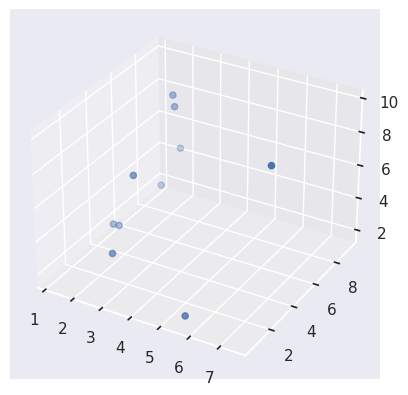

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    xs = data['star_wars'],
    ys = data['lord_of_the_rings'],
    zs = data['harry_potter']
)
plt.show()

# **Clustering Jerarquico**
---

In [29]:
z= linkage(data[movies], "ward")
z

array([[ 0.        ,  9.        ,  0.41231056,  2.        ],
       [ 1.        ,  6.        ,  0.6164414 ,  2.        ],
       [ 4.        ,  7.        ,  2.16794834,  2.        ],
       [ 3.        ,  8.        ,  3.48281495,  2.        ],
       [ 5.        , 10.        ,  5.2943366 ,  3.        ],
       [13.        , 14.        ,  6.59317829,  5.        ],
       [11.        , 12.        ,  6.66408283,  4.        ],
       [ 2.        , 15.        , 10.62355873,  6.        ],
       [16.        , 17.        , 12.8156935 , 10.        ]])

- Agrupa por pares
- 0 y 9 formaron el grupo 10 tienen 2 elementos
- 1 y 6 formaron el grupo 11 tienen 2 elementos
- 4 y 7 formaron el grupo 12 tienen 2 elementos
- 3 y 8 formaron el grupo 13 tienen 2 elementos
- 5 y 10 formaron el grupo 14 tienen 3 elementos
- 13 y 14 formaron el grupo 15 tienen 5 elementos
- 11 y 12 formaron el grupo 16 tienen 4 elementos
- 2 y 15 formaron el grupo 17 tienen 6 elementos
- 16 y 17 formaron el grupo 18 tienen 10 elementos

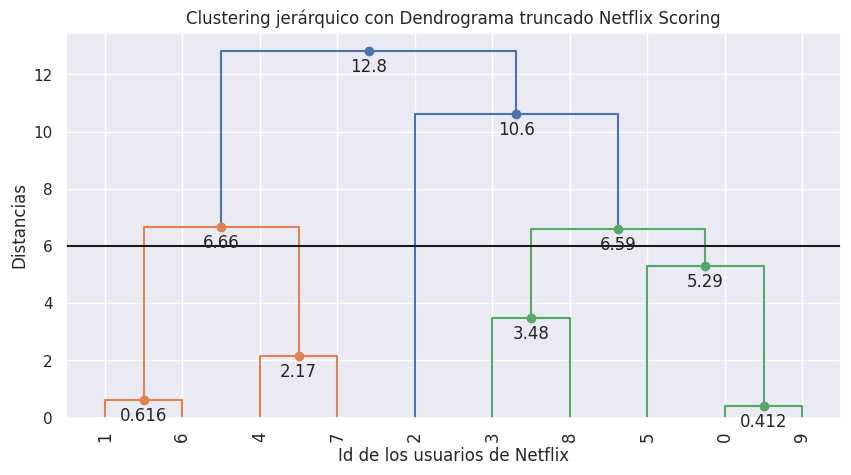

In [30]:
dendogram_tune(
    z,
    truncate_mode = 'lastp',
    p = 12,
    leaf_rotation = 90,
    leaf_font_size = 12,
    show_contracted = True,
    figsize=(10, 5),
    max_d = 6,
    title = "Clustering jerárquico con Dendrograma truncado Netflix Scoring",
    xlabel = "Id de los usuarios de Netflix",
    ylabel = "Distancias"
)

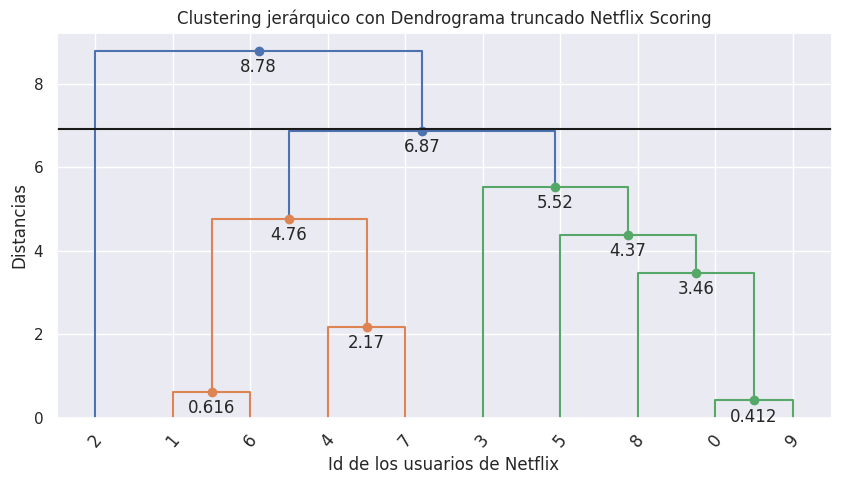

In [31]:
z = linkage(data[movies], "average")
dendogram_tune(
    z,
    truncate_mode = 'lastp',
    p = 12,
    leaf_rotation = 50,
    leaf_font_size = 12,
    show_contracted = True,
    figsize=(10, 5),
    max_d = 6.9, # Grafica una linea horizontal
    title = "Clustering jerárquico con Dendrograma truncado Netflix Scoring",
    xlabel = "Id de los usuarios de Netflix",
    ylabel = "Distancias"
)

- Con el metodo del promedio, lo ha excluido hasta el final, eso se produce, ya que ha colocado una calificacion alta en comparacion con el resto.

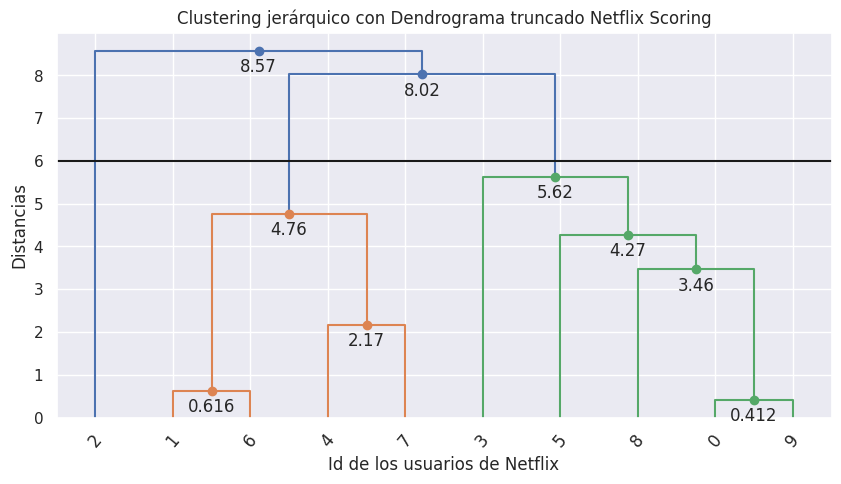

In [32]:
z = linkage(data[movies], "weighted")
dendogram_tune(
    z,
    truncate_mode = 'lastp',
    p = 12,
    leaf_rotation = 50,
    leaf_font_size = 12,
    show_contracted = True,
    figsize=(10, 5),
    max_d = 6, # Grafica una linea horizontal
    title = "Clustering jerárquico con Dendrograma truncado Netflix Scoring",
    xlabel = "Id de los usuarios de Netflix",
    ylabel = "Distancias"
)

In [33]:
z= linkage(data[movies], "ward")
z

array([[ 0.        ,  9.        ,  0.41231056,  2.        ],
       [ 1.        ,  6.        ,  0.6164414 ,  2.        ],
       [ 4.        ,  7.        ,  2.16794834,  2.        ],
       [ 3.        ,  8.        ,  3.48281495,  2.        ],
       [ 5.        , 10.        ,  5.2943366 ,  3.        ],
       [13.        , 14.        ,  6.59317829,  5.        ],
       [11.        , 12.        ,  6.66408283,  4.        ],
       [ 2.        , 15.        , 10.62355873,  6.        ],
       [16.        , 17.        , 12.8156935 , 10.        ]])

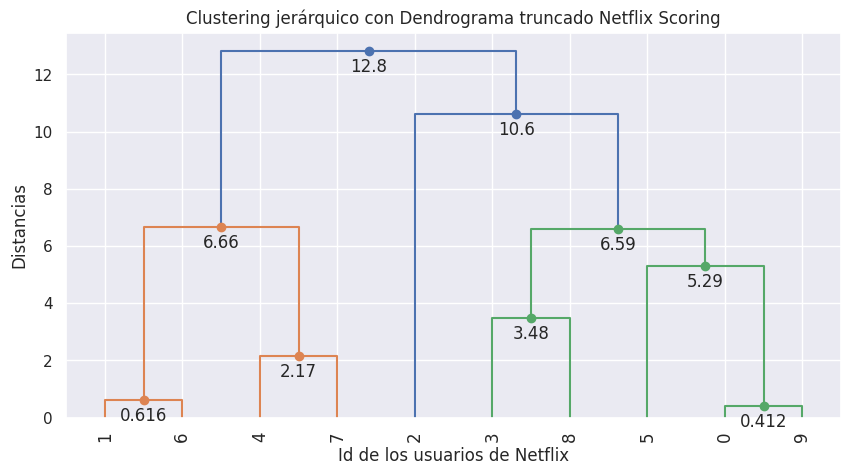

In [34]:
dendogram_tune(
    z,
    truncate_mode = 'lastp',
    p = 12,
    leaf_rotation = 90,
    leaf_font_size = 12,
    show_contracted = True,
    figsize=(10, 5),
    title = "Clustering jerárquico con Dendrograma truncado Netflix Scoring",
    xlabel = "Id de los usuarios de Netflix",
    ylabel = "Distancias"
)

# **Factor de inconsistencia**
---

- h_i: altura en la que se une cada segmento
- avg(h_j): promedio de union
- std(h_j): desviacion de todos los puntos de union

Inconsistencia = ((h_i)-(avg(h_j)))/std(h_j)

In [46]:
depth = 3
incons = inconsistent(z, depth)
incons

array([[0.41231056, 0.        , 1.        , 0.        ],
       [0.6164414 , 0.        , 1.        , 0.        ],
       [2.16794834, 0.        , 1.        , 0.        ],
       [3.48281495, 0.        , 1.        , 0.        ],
       [2.85332358, 3.45211371, 2.        , 0.70710678],
       [3.9456601 , 2.67874756, 4.        , 0.9883418 ],
       [3.14949086, 3.14102865, 3.        , 1.11893025],
       [6.49847214, 3.03147045, 4.        , 1.36075434],
       [6.58015052, 4.69620517, 6.        , 1.32778334]])

- Primera columna: promedio
- Segunda columna: desviacion estandar
- Tercera columna: numero de elementos
- Cuarta columna: factor de inconsistencia para cada union

- Se aprecia que el factor de inconsistencia es el *1*, hay que anotar que tambien se debe por los pocos registros.

In [61]:
# Por distancia
max_d = 5
cluster = fcluster(z, max_d, criterion = 'distance')
cluster

array([4, 1, 6, 3, 2, 5, 1, 2, 3, 4], dtype=int32)

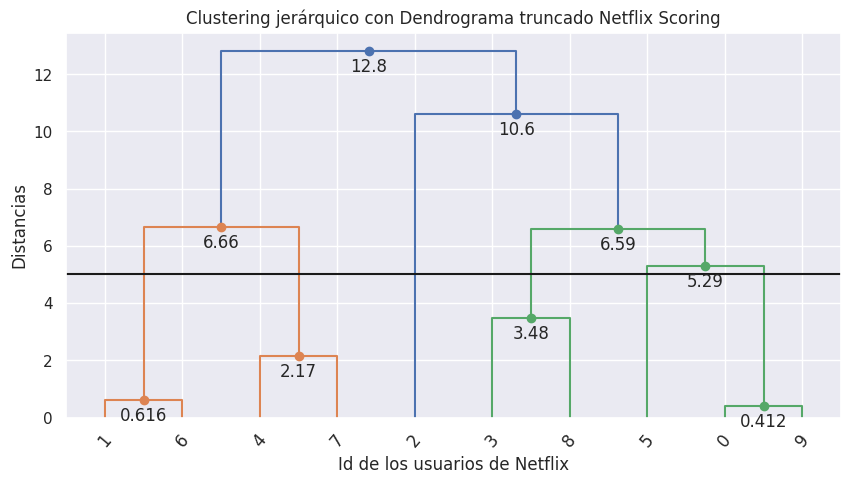

In [62]:
dendogram_tune(
    z,
    truncate_mode = 'lastp',
    p = 12,
    leaf_rotation = 50,
    leaf_font_size = 12,
    show_contracted = True,
    figsize=(10, 5),
    max_d=max_d, # Grafica una linea horizontal
    title = "Clustering jerárquico con Dendrograma truncado Netflix Scoring",
    xlabel = "Id de los usuarios de Netflix",
    ylabel = "Distancias"
)

In [53]:
# Por K
k = 3
cluster = fcluster(z, k, criterion = 'maxclust')
cluster

array([2, 1, 3, 2, 1, 2, 1, 1, 2, 2], dtype=int32)